In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
trees=pd.read_csv('trees.csv')
trees.head()

,CODI,X_ETRS89,Y_ETRS89,LATITUD_WGS84,LONGITUD_WGS84,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,...,CATEGORIA_ARBRAT,AMPLADA_VORERA,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,...,NaN,NaN,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA


In [127]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157319 entries, 0 to 157318
Data columns (total 25 columns):
CODI                  157319 non-null object
X_ETRS89              157319 non-null float64
Y_ETRS89              157319 non-null float64
LATITUD_WGS84         157319 non-null float64
LONGITUD_WGS84        157319 non-null float64
TIPUS_ELEMENT         157319 non-null object
ESPAI_VERD            26957 non-null object
ADRECA                157319 non-null object
ALCADA                150938 non-null object
CAT_ESPECIE_ID        157319 non-null int64
NOM_CIENTIFIC         157319 non-null object
NOM_CASTELLA          153819 non-null object
NOM_CATALA            153631 non-null object
CATEGORIA_ARBRAT      153698 non-null object
AMPLADA_VORERA        130439 non-null float64
DATA_PLANTACIO        23421 non-null object
TIPUS_AIGUA           3715 non-null object
TIPUS_REG             157306 non-null object
TIPUS_SUPERFICIE      152462 non-null object
TIPUS_SUPORT          152522 non-n

In [12]:
trees.shape

(157319, 23)

In [16]:
trees.columns

Index(['CODI', 'X_ETRS89', 'Y_ETRS89', 'LATITUD_WGS84', 'LONGITUD_WGS84',
       'TIPUS_ELEMENT', 'ESPAI_VERD', 'ADRECA', 'ALCADA', 'CAT_ESPECIE_ID',
       'NOM_CIENTIFIC', 'NOM_CASTELLA', 'NOM_CATALA', 'CATEGORIA_ARBRAT',
       'AMPLADA_VORERA', 'DATA_PLANTACIO', 'TIPUS_AIGUA', 'TIPUS_REG',
       'TIPUS_SUPERFICIE', 'TIPUS_SUPORT', 'COBERTURA_ESCOCELL',
       'MIDA_ESCOCELL', 'VORA_ESCOCELL'],
      dtype='object')

In [14]:
#Altura de los arboles
trees.MIDA_ESCOCELL.unique()

array(['major que o igual a  100 cm', nan, 'ENTRE 60 I 100 cm',
       'menor que o igual a 60 cm', 'ALTRES'], dtype=object)

In [22]:
altura=trees.groupby(['MIDA_ESCOCELL']).CODI.count().reset_index()
altura['perc']=altura.CODI.apply(lambda x: round(x/altura.CODI.sum(),2))
altura

,MIDA_ESCOCELL,CODI,perc
0,ALTRES,200,0.00
1,ENTRE 60 I 100 cm,59948,0.44
2,major que o igual a 100 cm,73800,0.54
3,menor que o igual a 60 cm,3206,0.02


In [126]:
altura2=trees.groupby(['ALCADA']).CODI.count().reset_index()
altura2['perc']=altura.CODI.apply(lambda x: round(x/altura.CODI.sum(),2))
altura2

,ALCADA,CODI,perc
0,EXEMPLAR,5385,0.00
1,GRAN,39855,0.44
2,MITJANA,63987,0.54
3,PETITA,41711,0.02


In [129]:
trees.groupby(['ALCADA','MIDA_ESCOCELL']).CODI.count().unstack()

MIDA_ESCOCELL,ALTRES,ENTRE 60 I 100 cm,major que o igual a 100 cm,menor que o igual a 60 cm
ALCADA,,,,
EXEMPLAR,7,1874,2765,39
GRAN,32,14376,21332,352
MITJANA,26,24703,30273,1173
PETITA,126,17032,17017,1498


In [55]:
from geojson import Point

def cardinal(x):
    long=x[0]
    lat=x[1]
    return f'POINT{(long,lat)}'

trees['geopoint']=trees[['LONGITUD_WGS84','LATITUD_WGS84']].apply(cardinal,axis=1)
trees.head()

,CODI,X_ETRS89,Y_ETRS89,LATITUD_WGS84,LONGITUD_WGS84,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,...,AMPLADA_VORERA,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL,geopoint
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,...,NaN,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1659192000000003, 41.4384419)"
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES,"POINT(2.1653528, 41.43728660000001)"
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES,"POINT(2.165436, 41.437335299999994)"
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1625299, 41.437769)"
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1625007999999997, 41.437788299999994)"


In [60]:
import geopandas as gp

treesgp=gp.GeoDataFrame(trees,geometry=gp.points_from_xy(trees.LONGITUD_WGS84,trees.LATITUD_WGS84))
treesgp.head()

,CODI,X_ETRS89,Y_ETRS89,LATITUD_WGS84,LONGITUD_WGS84,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,...,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL,geopoint,geometry
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,...,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1659192000000003, 41.4384419)",POINT (2.16592 41.43844)
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES,"POINT(2.1653528, 41.43728660000001)",POINT (2.16535 41.43729)
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES,"POINT(2.165436, 41.437335299999994)",POINT (2.16544 41.43734)
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1625299, 41.437769)",POINT (2.16253 41.43777)
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1625007999999997, 41.437788299999994)",POINT (2.16250 41.43779)


In [8]:
city_edges=pd.read_csv('city_edges.csv').drop('Unnamed: 0',axis=1)
city_edges.head()

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,service,junction,access,width,bridge,ref,est_width,tunnel,area
0,412549129,30960821,0,74621162,True,2,Avinguda de la República Argentina,tertiary,30,43.873,"LINESTRING (2.1471937 41.4085797, 2.1473875 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,412549130,7095943437,0,36726124,True,2,Carrer de Velázquez,residential,30,72.002,"LINESTRING (2.1480663 41.4076648, 2.1481699 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,412549130,415950289,0,"[486756070, 284386838, 486756071]",True,2,Avinguda de la República Argentina,tertiary,30,168.370,"LINESTRING (2.1480663 41.4076648, 2.1486572 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,412549132,30960820,0,34099200,True,NaN,Carrer de Ferran Puig,residential,30,44.225,"LINESTRING (2.1463234 41.4078675, 2.1466764 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,412549132,1487379449,0,35172817,True,NaN,Carrer d'Escipió,residential,30,65.618,"LINESTRING (2.1463234 41.4078675, 2.1468438 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
type(city_edges)

pandas.core.frame.DataFrame

In [9]:
city_edges.dtypes

u              int64
v              int64
key            int64
osmid         object
oneway        object
lanes         object
name          object
highway       object
maxspeed      object
length       float64
geometry      object
service       object
junction      object
access        object
width         object
bridge        object
ref           object
est_width     object
tunnel        object
area          object
dtype: object

In [ ]:
#agregar arboles a las calles



In [71]:
citygp=gp.GeoDataFrame(city_edges)
citygp.head()

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,service,junction,access,width,bridge,ref,est_width,tunnel,area
0,412549129,30960821,0,74621162,True,2,Avinguda de la República Argentina,tertiary,30,43.873,"LINESTRING (2.1471937 41.4085797, 2.1473875 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,412549130,7095943437,0,36726124,True,2,Carrer de Velázquez,residential,30,72.002,"LINESTRING (2.1480663 41.4076648, 2.1481699 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,412549130,415950289,0,"[486756070, 284386838, 486756071]",True,2,Avinguda de la República Argentina,tertiary,30,168.370,"LINESTRING (2.1480663 41.4076648, 2.1486572 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,412549132,30960820,0,34099200,True,NaN,Carrer de Ferran Puig,residential,30,44.225,"LINESTRING (2.1463234 41.4078675, 2.1466764 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,412549132,1487379449,0,35172817,True,NaN,Carrer d'Escipió,residential,30,65.618,"LINESTRING (2.1463234 41.4078675, 2.1468438 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
joined=gp.sjoin(treesgp,citygp,op='within',how='left')
joined

AttributeError: 'str' object has no attribute 'bounds'

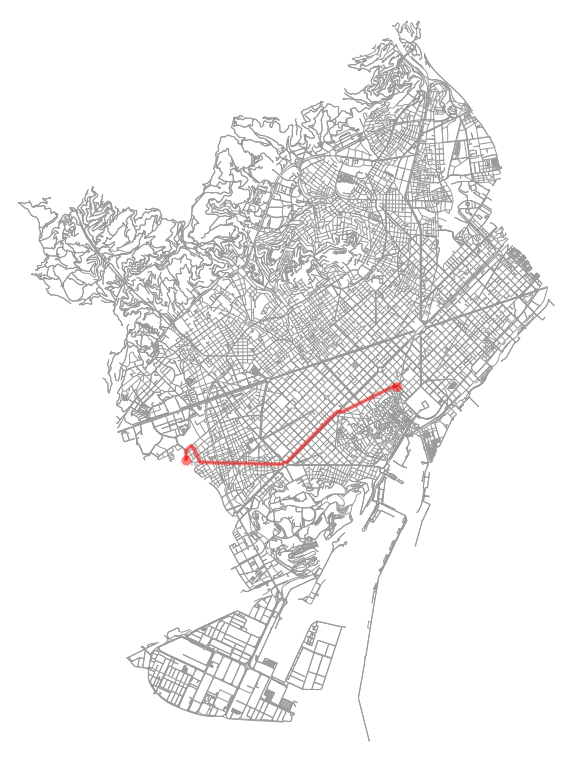

In [79]:
import osmnx as ox
import networkx as nx

G=ox.graph_from_place('Barcelona, Spain', network_type='bike',retain_all=False)

#ROUTING:

# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (41.391052, 2.180645)) #arc d tionf
dest_node = ox.get_nearest_node(G, (41.3751984992, 2.12036451854))#camp nou

# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0,fig_height=15,fig_width=10)



In [81]:

treesgp2=gp.GeoDataFrame(trees,geometry=gp.points_from_xy(trees.LATITUD_WGS84,trees.LONGITUD_WGS84))
treesgp2.head()

,CODI,X_ETRS89,Y_ETRS89,LATITUD_WGS84,LONGITUD_WGS84,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,...,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL,geopoint,geometry
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,...,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1659192000000003, 41.4384419)",POINT (41.43844 2.16592)
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES,"POINT(2.1653528, 41.43728660000001)",POINT (41.43729 2.16535)
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES,"POINT(2.165436, 41.437335299999994)",POINT (41.43734 2.16544)
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1625299, 41.437769)",POINT (41.43777 2.16253)
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,"POINT(2.1625007999999997, 41.437788299999994)",POINT (41.43779 2.16250)


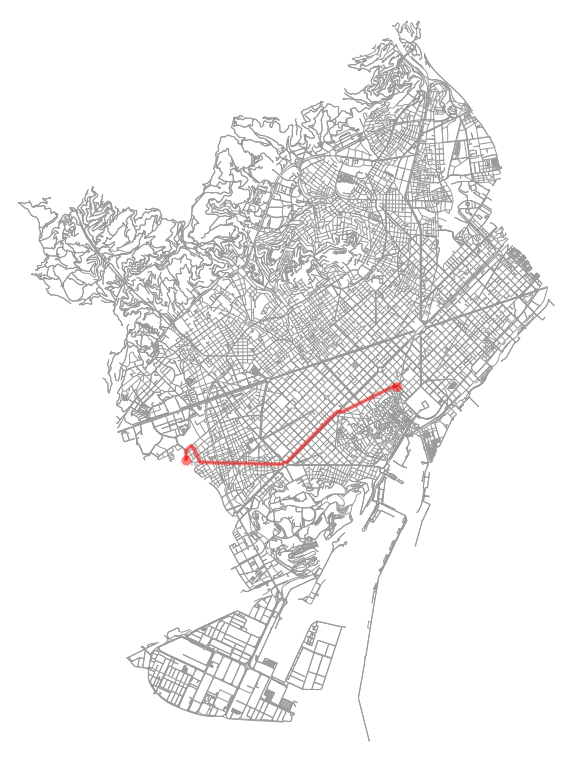

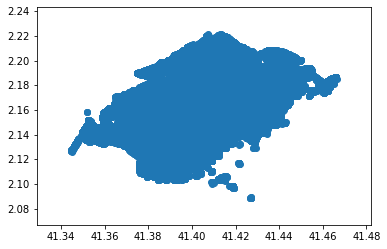

In [102]:
fig, ax = ox.plot_graph_route(G, route, node_size=0,fig_height=15,fig_width=10)
plt.scatter(treesgp2.LATITUD_WGS84,treesgp2.LONGITUD_WGS84)

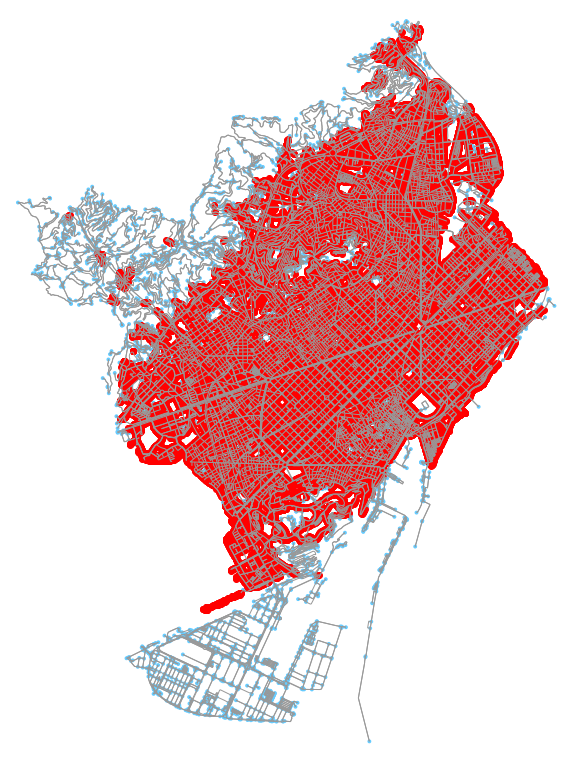

In [112]:
fig, ax = ox.plot_graph(G, show=False, close=False,fig_height=15,fig_width=10)
ax.scatter(treesgp2.LONGITUD_WGS84,treesgp2.LATITUD_WGS84,c='red')
plt.show()

In [118]:
trees_altos=trees[trees['MIDA_ESCOCELL']=='major que o igual a 100 cm']
trees_altos.shape

(0, 25)

In [113]:
altura=trees.groupby(['MIDA_ESCOCELL']).CODI.count().reset_index()
altura['perc']=altura.CODI.apply(lambda x: round(x/altura.CODI.sum(),2))
altura

,MIDA_ESCOCELL,CODI,perc
0,ALTRES,200,0.00
1,ENTRE 60 I 100 cm,59948,0.44
2,major que o igual a 100 cm,73800,0.54
3,menor que o igual a 60 cm,3206,0.02


In [122]:
trees_altos=trees[trees['MIDA_ESCOCELL']==altura.iloc[2,0]]
trees_altos.shape

(73800, 25)

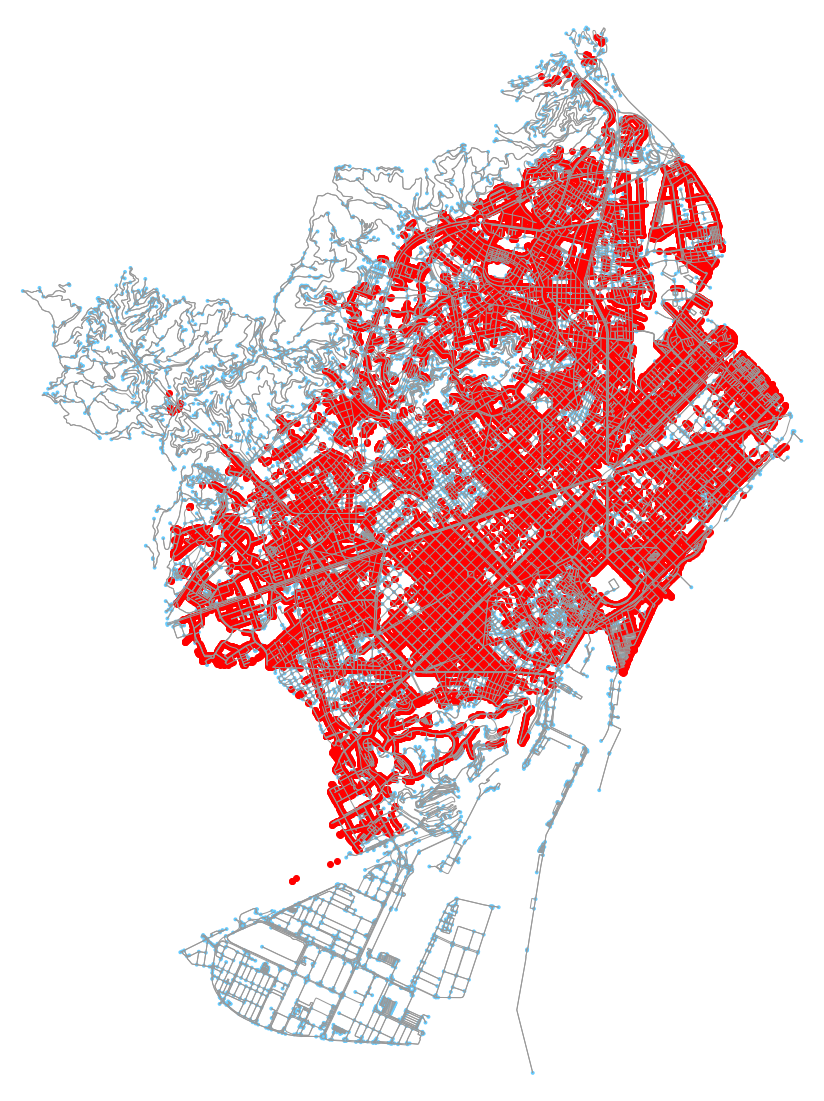

In [124]:
fig, ax = ox.plot_graph(G, show=False, close=False,fig_height=20,fig_width=15)
ax.scatter(trees_altos.LONGITUD_WGS84,trees_altos.LATITUD_WGS84,c='red')
plt.show()